# Feature Selection, Model Selection and Tuning Project 5 - Credit Card Users Churn Prediction
## Paige Singleton
## September 2022
## Problem Statement 
### 'Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards'
### 'Identify the best possible model that will give the required performance'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install shap

In [3]:

df = pd.read_csv("BankChurners.csv")
data = df.copy()

## Exploratory Data Analysis and Insights

##### - Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
#number of rows and columns
data.shape


(10127, 21)

In [7]:
# check for null values
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [8]:
#number of unique values in each column
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [9]:
#Check for duplicates
data[data.duplicated()].count()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
#Understand the values of column that contains nulls 
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [11]:
#Understand the values of column that contains nulls 
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [12]:
#Understand the values in each column that is categorical (regardless of type)
cat_cols = ['Attrition_Flag','Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for col in cat_cols:
    print(data[col].value_counts())
    print("_________________________________")

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
_________________________________
F    5358
M    4769
Name: Gender, dtype: int64
_________________________________
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
_________________________________
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
_________________________________
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
_________________________________
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
_________________________________
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
_________________________________
3 

In [13]:
# Calculate summary stats for numerical columns that are not categories
num_cols = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397
Total_Trans_Amt,10127.0,4404.086304,3397.129254,510.0,2155.500,3899.000,4741.000,18484.000
Total_Trans_Ct,10127.0,64.858695,23.472570,10.0,45.000,67.000,81.000,139.000
Total_Ct_Chng_Q4_Q1,10127.0,0.712222,0.238086,0.0,0.582,0.702,0.818,3.714
Avg_Utilization_Ratio,10127.0,0.274894,0.275691,0.0,0.023,0.176,0.503,0.999


### Initial Insights

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
    - Drop from dataset as this is a sequence value and not informative
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
    - Target variable
    - change to 1 (churn - attrited customer) and 0 (not churn - existing customer)
- Customer_Age: Age in Years
    - 45 unique values 
    - no nulls
    - mean is approx equal to median
    - currently integer therefore no changes needed
- Gender: Gender of the account holder
    - Object with 2 unique values
    - change to category and encode
- Dependent_count: Number of dependents
    - int64 with 6 unigue values
    - change to category and encode
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
    - Object with 6 unique values and 1519 nulls
    - Change to numeric values in the following order (uneducated - 0, High school - 1, College - 2, Graduate - 3, Post Graduate - 4, Doctorate - 5, Unknown (null) - 6)
    - Encode
    - Explore relationship between education and other variable to determine best strategy for imputing null (unknown) values
- Marital_Status: Marital Status of the account holder
    - Object with 3 uniqu values 
    - 749 null values 
    - change to mumeric (Married -1, Single - 2, Divorced - 3)
    - Encode 
    - Explore relationship between education and other variable to determine best strategy for imputing null (unknown) values   
- Income_Category: Annual Income Category of the account holder
    - object with 6 unique values
    - value 'abc' will need to be replaced; Explore relationship between education and other variable to determine best strategy for imputing null (unknown) values  
    - 5 values will need to be changes to numeric and categorized and encoded (Less than $40K: 0, $40K - $60K:1,$60K - $80K:2, $80K - $120K:3,$120K +:4)
- Card_Category: Type of Card
    - object with 4 unique values
    - change to numeric, categorize and encode (Blue: 0, Silver:1, Gold,2; Platimum:3)
- Months_on_book: Period of relationship with the bank
    - int64 with 44 unique values
    - mean is approx equal to median
- Total_Relationship_Count: Total no. of products held by the customer
    - int64 with 6 unique values
    - change to category and encode 
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
    - int64 with 7 unique values 
    - change to category and encode 
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
    - int64 with 7 unique values
    - change to category and encode
- Credit_Limit: Credit Limit on the Credit Card
    - float64 
    - mean is significantly greater than median therefore explore scaling therefore data is likely skewed to the right
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
    - int64
    - mean is slightly lower than median there for data is likely slightly skewed to the left
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
    - float64 
    - mean is significantly greater than median therefore explore scaling therefore data is likely skewed to the right
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
    - int64
    - mean is slightly greater than median therefore the data is likely skewed to the right
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
    - int64 with value count of 126
    - mean is approximately equal to the median
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
    - float64
    - mean is approx equal to median
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter; 
    - float64
    - mean is approx equal to median
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
    - float64
    - mean is greater than median therefore data is likely skewed to the right

### Univariate and Bivariate Analysis

In [14]:
#convert data type of category columns
data[cat_cols] = data[cat_cols].astype('category')

In [15]:
# From Anime Rating Prediction case study, function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


##### EDA - Numerical variable - Customer Age

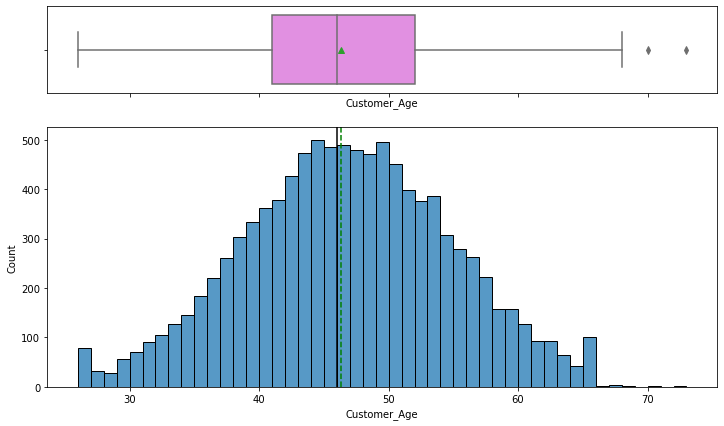

In [16]:
# Distribution of customer age
histogram_boxplot(data, 'Customer_Age')

In [36]:
data.groupby(['Attrition_Flag'])['Customer_Age'].median()

Attrition_Flag
Attrited Customer    47.0
Existing Customer    46.0
Name: Customer_Age, dtype: float64

##### EDA - Numerical variable - Month on book

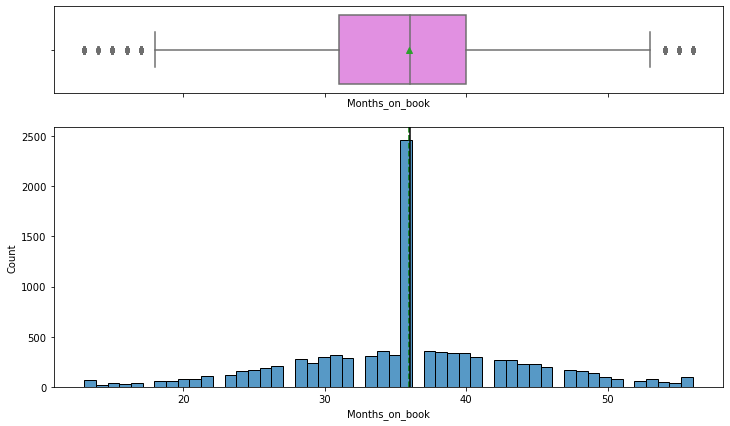

In [17]:
# Distribution of months on book
histogram_boxplot(data, 'Months_on_book')

In [37]:
data.groupby(['Attrition_Flag'])['Months_on_book'].median()

Attrition_Flag
Attrited Customer    36.0
Existing Customer    36.0
Name: Months_on_book, dtype: float64

##### EDA - Numerical variable - Credit Limit

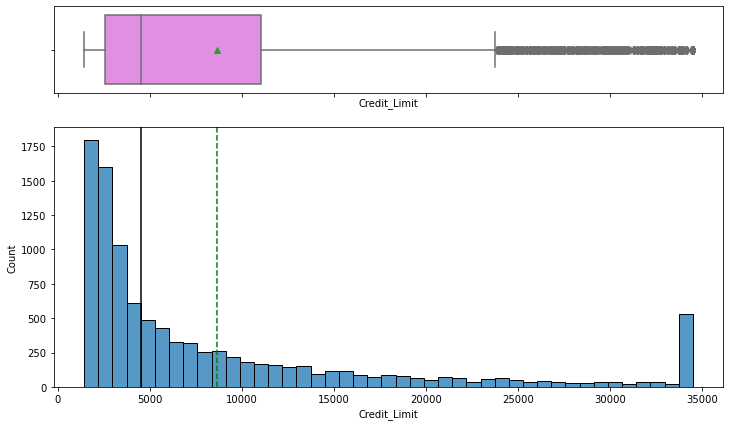

In [18]:
# Distribution of credit limit
histogram_boxplot(data, 'Credit_Limit')

In [39]:
data.groupby(['Attrition_Flag'])['Credit_Limit'].median()

Attrition_Flag
Attrited Customer    4178.0
Existing Customer    4643.5
Name: Credit_Limit, dtype: float64

##### EDA - Numerical variable - Total Revolving Balance

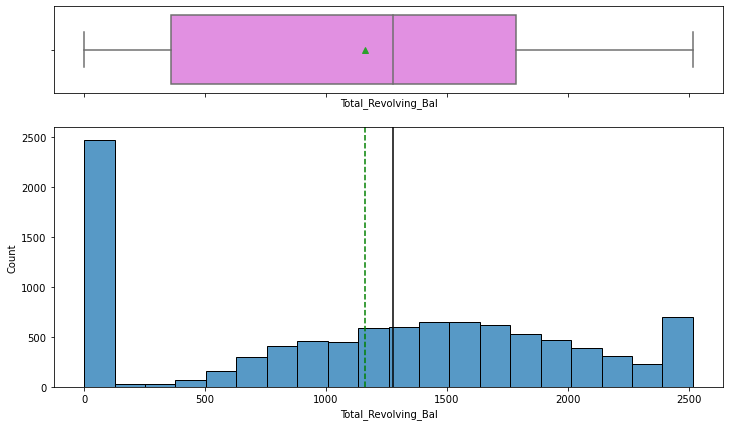

In [19]:
# Distribution of total revolving balance
histogram_boxplot(data, 'Total_Revolving_Bal')

In [40]:
data.groupby(['Attrition_Flag'])['Total_Revolving_Bal'].median()

Attrition_Flag
Attrited Customer       0.0
Existing Customer    1364.0
Name: Total_Revolving_Bal, dtype: float64

##### EDA - Numerical variable - Average open to buy

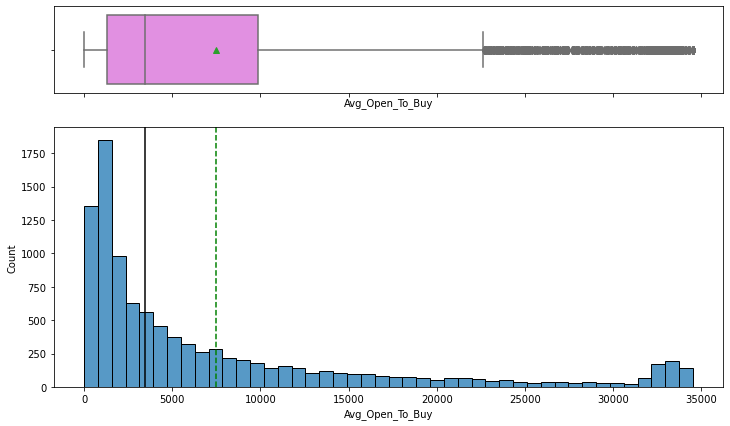

In [20]:
# Distribution of average open to buy
histogram_boxplot(data, 'Avg_Open_To_Buy')

In [41]:
data.groupby(['Attrition_Flag'])['Avg_Open_To_Buy'].median()

Attrition_Flag
Attrited Customer    3488.0
Existing Customer    3469.5
Name: Avg_Open_To_Buy, dtype: float64

##### EDA - Numerical variable - Total amount change 

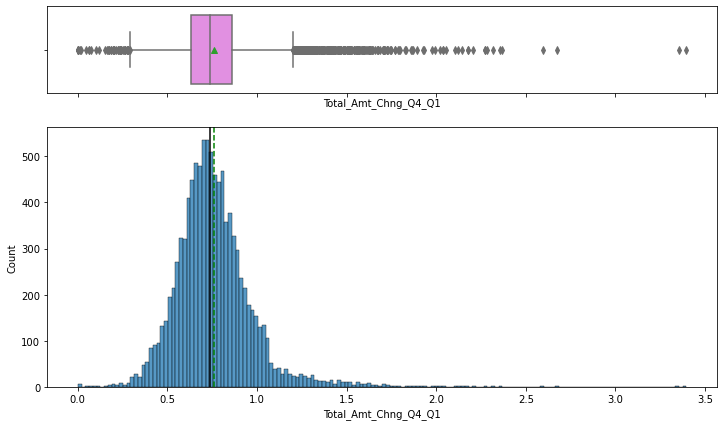

In [21]:
# Distribution of Total amount change 
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1')

In [42]:
data.groupby(['Attrition_Flag'])['Total_Amt_Chng_Q4_Q1'].median()

Attrition_Flag
Attrited Customer    0.701
Existing Customer    0.743
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

##### EDA - Numerical variable - Total Transaction amount

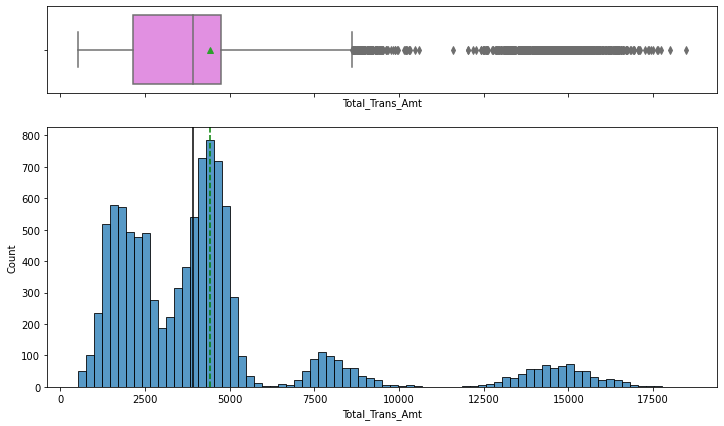

In [22]:
# Distribution of Total transaction amount
histogram_boxplot(data, 'Total_Trans_Amt')

In [43]:
data.groupby(['Attrition_Flag'])['Total_Trans_Amt'].median()

Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64

##### EDA - Numerical variable - Total Transaction Count 

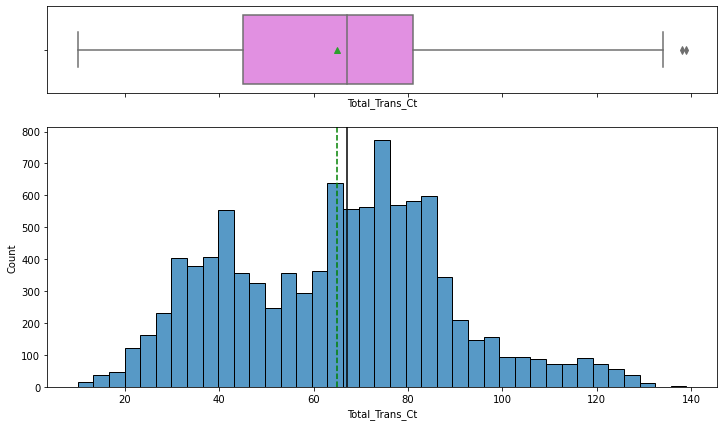

In [23]:
# Distribution of total transaction count 
histogram_boxplot(data, 'Total_Trans_Ct')

In [44]:
data.groupby(['Attrition_Flag'])['Total_Trans_Ct'].median()

Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64

##### EDA - Numerical variable - Total Count change 

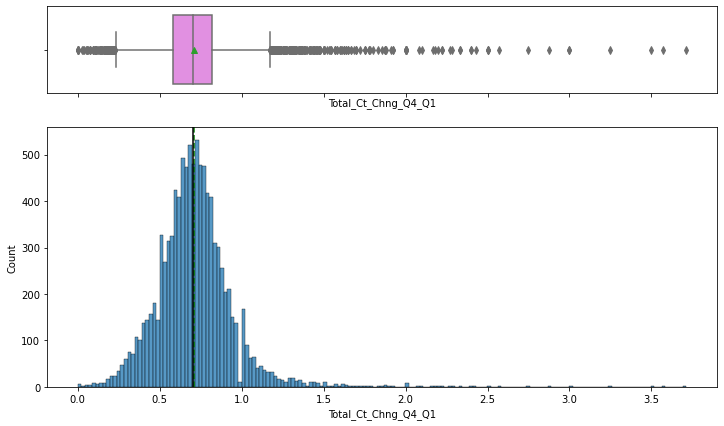

In [24]:
# Distribution of total count change 
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')

In [46]:
data.groupby(['Attrition_Flag'])['Total_Ct_Chng_Q4_Q1'].median()

Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

##### EDA - Numerical variable - Average Utilization Ratio

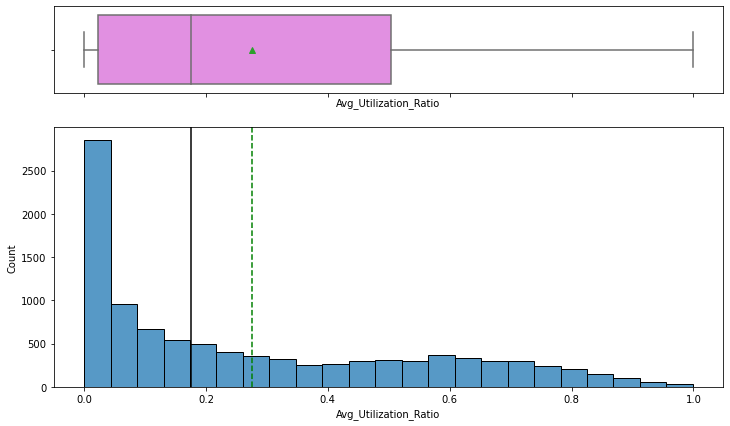

In [25]:
# Distribution of average utilization ratio
histogram_boxplot(data, 'Avg_Utilization_Ratio')

In [47]:
data.groupby(['Attrition_Flag'])['Avg_Utilization_Ratio'].median()

Attrition_Flag
Attrited Customer    0.000
Existing Customer    0.211
Name: Avg_Utilization_Ratio, dtype: float64

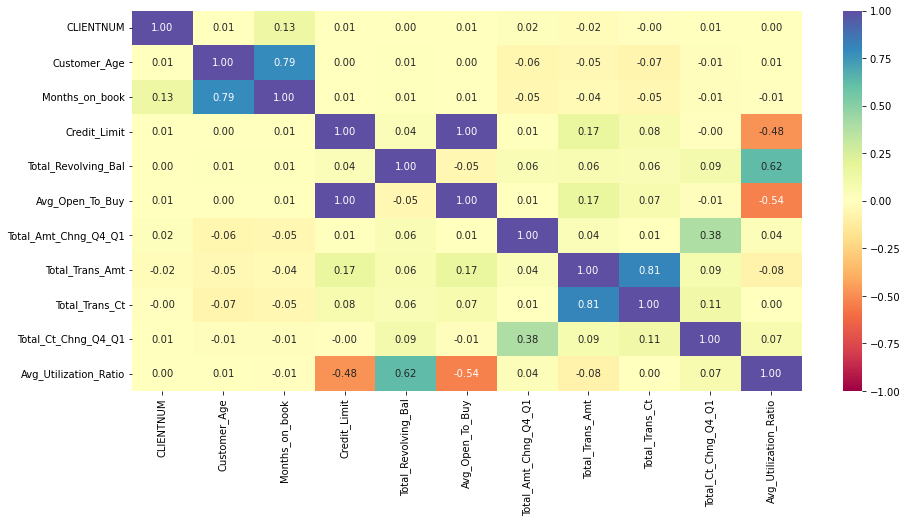

In [ ]:
#Explore numerical variable relationships and multi-collinearity
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Insights on Numerical columns 
- Customer_Age; data is close to normally distributed; check for outlier treatment
- Months_on_book: very strange distribution; one value dominates the dataset which is otherwise normally distributed; check for outlier treatment; median months on books for both existing and attiting cusotmers is 36
- Credit_Limit: Data is skewed; consider log or z transformation; check for outlier treatment; Median - Attrited Customer: 4178.0; Median - Existing Customer: 4643.5
- Total_Revolving_Bal: Other than high number of values on the low end, (and to some extent the high end); data is evenly distributed; consider minmax scaling;Median -  Attrited Customer: 0.0; Existing Customer: 1364.0; consider removing this variable as it may be calculated after the customer has attrited
- Avg_Open_To_Buy: Data is skewed; consider log or z transformation; check for outlier treatment; Median - Attrited Customer: 3488.0; Median -Existing Customer: 3469.5
- Total_Amt_Chng_Q4_Q1: rsomewhat normally distributed; check for outlier treatment; Median Attrited Customer:  0.701; Median xisting Customer:0.743
- Total_Trans_Amt: multi - modal distribution; consider z-transformation; check for outliers; Median Attrited Customer:2329.0; Median Existing Customer: 4100.0
- Total_Trans_Ct: bimodal distribution (somewhat normal); check for outlier treatment; Median Attrited Customer: 43.0; Median Existing Customer: 71.0
- Total_Ct_Chng_Q4_Q1: Somewhat normal distribution with outliers; check for outlier treatment; Median Attrited Customer: 0.531; Median Existing Customer: 0.721
- Avg_Utilization_Ratio: skewed distrubtion; consider log or z transformation; Median - Attrited Customer: 0.000; Median -Existing Customer: 0.211

#### Multi-collinearity
- Customer Age and Months on Books: .79
- Avg Utilization ratio and Credit Limit: -.48
- Avg Utilization ratio and Total revolving balance: .62
- Avg Utilization ratio and avg open to buy: -.54
- Total transaction amt and Total transaction count: .81

Consider dropping variables based on multi collinearity


##### EDA - Categorical variable - Gender

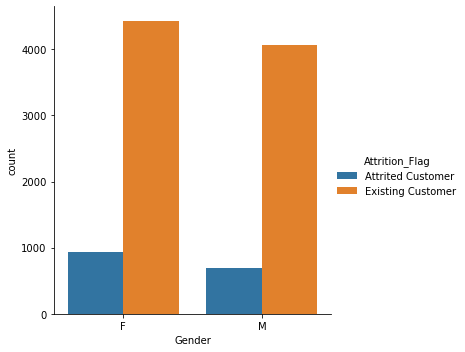

In [30]:
sns.catplot(data=data, kind='count',x='Gender', hue='Attrition_Flag')

In [32]:
data['Gender'].value_counts(1)*100

F    52.908068
M    47.091932
Name: Gender, dtype: float64

In [53]:
data.groupby(['Attrition_Flag'])['Gender'].value_counts(1)*100

Attrition_Flag      
Attrited Customer  F    57.160418
                   M    42.839582
Existing Customer  F    52.094118
                   M    47.905882
Name: Gender, dtype: float64

##### EDA - Categorical variable - Dependent Count 

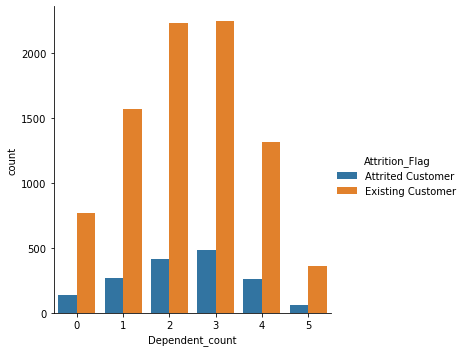

In [49]:
sns.catplot(data=data, kind='count',x='Dependent_count', hue='Attrition_Flag')

In [50]:
data['Dependent_count'].value_counts(1)*100

3    26.977387
2    26.217044
1    18.149501
4    15.542609
0     8.926632
5     4.186827
Name: Dependent_count, dtype: float64

In [52]:
data.groupby(['Attrition_Flag'])['Dependent_count'].value_counts(1)*100

Attrition_Flag      
Attrited Customer  3    29.625077
                   2    25.629994
                   1    16.533497
                   4    15.980332
                   0     8.297480
                   5     3.933620
Existing Customer  3    26.470588
                   2    26.329412
                   1    18.458824
                   4    15.458824
                   0     9.047059
                   5     4.235294
Name: Dependent_count, dtype: float64

##### EDA - Categorical variable - Education Level 

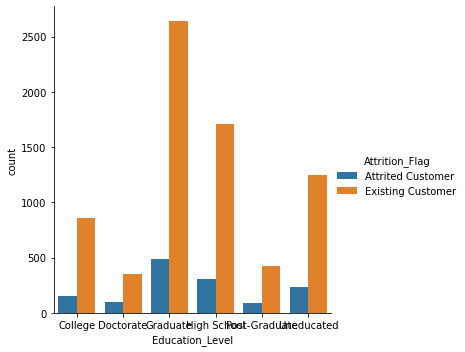

In [56]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [57]:
data['Education_Level'].value_counts(1)*100

Graduate         36.338290
High School      23.385223
Uneducated       17.274628
College          11.768123
Post-Graduate     5.994424
Doctorate         5.239312
Name: Education_Level, dtype: float64

In [58]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

Attrition_Flag                  
Attrited Customer  Graduate         35.521517
                   High School      22.319475
                   Uneducated       17.286652
                   College          11.232677
                   Doctorate         6.929249
                   Post-Graduate     6.710430
Existing Customer  Graduate         36.493022
                   High School      23.587122
                   Uneducated       17.272350
                   College          11.869559
                   Post-Graduate     5.858781
                   Doctorate         4.919165
Name: Education_Level, dtype: float64

In [59]:
data.groupby(['Education_Level'])['Customer_Age'].median()

Education_Level
College          46.0
Doctorate        47.0
Graduate         46.0
High School      46.0
Post-Graduate    47.0
Uneducated       46.0
Name: Customer_Age, dtype: float64

In [61]:
data.groupby(['Education_Level'])['Income_Category'].value_counts(1)*100

Education_Level                
College          Less than $40K    34.057256
                 $40K - $60K       18.065153
                 $80K - $120K      17.275420
                 $60K - $80K       13.030602
                 abc               10.661402
                 $120K +            6.910168
Doctorate        Less than $40K    35.033259
                 $40K - $60K       15.521064
                 abc               15.521064
                 $60K - $80K       13.082040
                 $80K - $120K      12.638581
                 $120K +            8.203991
Graduate         Less than $40K    36.413043
                 $40K - $60K       17.679028
                 $80K - $120K      15.281330
                 $60K - $80K       13.491049
                 abc               10.613811
                 $120K +            6.521739
High School      Less than $40K    33.333333
                 $40K - $60K       17.635370
                 $80K - $120K      15.300546
                 $60K -

In [62]:
data.groupby(['Income_Category'])['Education_Level'].value_counts(1)*100

Income_Category               
$120K +          Graduate         33.607908
                 High School      24.217463
                 Uneducated       19.604613
                 College          11.532125
                 Doctorate         6.095552
                 Post-Graduate     4.942339
$40K - $60K      Graduate         36.357659
                 High School      23.339908
                 Uneducated       16.370809
                 College          12.031558
                 Post-Graduate     7.297830
                 Doctorate         4.602235
$60K - $80K      Graduate         35.402685
                 High School      25.755034
                 Uneducated       16.359060
                 College          11.073826
                 Post-Graduate     6.459732
                 Doctorate         4.949664
$80K - $120K     Graduate         36.322188
                 High School      23.404255
                 Uneducated       16.489362
                 College          13.297872
 

##### EDA - Categorical variable - Marital Status

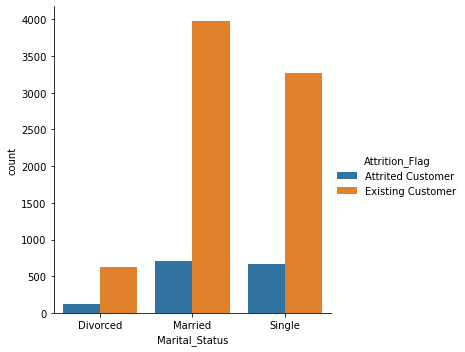

In [65]:
sns.catplot(data=data, kind='count',x='Marital_Status', hue='Attrition_Flag')

In [66]:
data['Marital_Status'].value_counts(1)*100

Married     49.978673
Single      42.045212
Divorced     7.976114
Name: Marital_Status, dtype: float64

In [67]:
data.groupby(['Attrition_Flag'])['Marital_Status'].value_counts(1)*100

Attrition_Flag             
Attrited Customer  Married     47.329773
                   Single      44.592790
                   Divorced     8.077437
Existing Customer  Married     50.482234
                   Single      41.560914
                   Divorced     7.956853
Name: Marital_Status, dtype: float64

In [68]:
data.groupby(['Marital_Status'])['Customer_Age'].median()

Marital_Status
Divorced    45.0
Married     47.0
Single      46.0
Name: Customer_Age, dtype: float64

In [69]:
data.groupby(['Income_Category'])['Marital_Status'].value_counts(1)*100

Income_Category          
$120K +          Married     52.058824
                 Single      40.294118
                 Divorced     7.647059
$40K - $60K      Married     49.215923
                 Single      42.460796
                 Divorced     8.323281
$60K - $80K      Married     50.846154
                 Single      40.846154
                 Divorced     8.307692
$80K - $120K     Married     52.537527
                 Single      40.100071
                 Divorced     7.362402
Less than $40K   Married     49.169435
                 Single      43.159166
                 Divorced     7.671398
abc              Married     47.864078
                 Single      43.106796
                 Divorced     9.029126
Name: Marital_Status, dtype: float64

In [70]:
data.groupby(['Dependent_count'])['Marital_Status'].value_counts(1)*100

Dependent_count          
0                Single      46.341463
                 Married     44.947735
                 Divorced     8.710801
1                Married     48.740480
                 Single      45.108377
                 Divorced     6.151142
2                Married     51.545564
                 Single      40.264954
                 Divorced     8.189482
3                Married     50.180505
                 Single      41.195347
                 Divorced     8.624148
4                Married     50.521195
                 Single      40.792217
                 Divorced     8.686588
5                Married     53.229974
                 Single      40.568475
                 Divorced     6.201550
Name: Marital_Status, dtype: float64

##### EDA - Categorical variable - Income Category

In [ ]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [ ]:
data['Education_Level'].value_counts(1)*100

In [ ]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

##### EDA - Categorical variable - Card Category

In [ ]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [ ]:
data['Education_Level'].value_counts(1)*100

In [ ]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

##### EDA - Categorical variable - Total Relationship count

In [ ]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [ ]:
data['Education_Level'].value_counts(1)*100

In [ ]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

##### EDA - Categorical variable - MOnths Inactive

In [ ]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [ ]:
data['Education_Level'].value_counts(1)*100

In [ ]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

##### EDA - Categorical variable - Contacts Counts

In [ ]:
sns.catplot(data=data, kind='count',x='Education_Level', hue='Attrition_Flag')

In [ ]:
data['Education_Level'].value_counts(1)*100

In [ ]:
data.groupby(['Attrition_Flag'])['Education_Level'].value_counts(1)*100

### Insights on Categorical columns 
- Gender: does not appear to influence Attrition: Data; higher percentage of females attrited than males
- Dependent Count: Attrition rates do not appear to be influenced by dependent count (other than a slightly higher rate of 29% attrited customers for dependent count of 3)
- Education_Level: Education Level does not appear to influence Attrition rate; consider dropping Education level which has 1519 nulls (15%  of data) and does not appear to inform attrition rate and does not appear to be related to either Customer age or income level (creating a risk of imputing the mode for nulls in the data)
- Marital Status: marital Status appears to slightly influence Attrition; Impute missing values based on dependent count; dependent count 0 - Single; dependent count 1 or greater is Married
- Income Category
- Card Category
- Total Relationship Count
- Months Inactive
- Contacts Counts



In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              10127 non-null  floa

In [ ]:
# Explore relationships and distributin of variablesa
sns.pairplot(data = data , hue='Attrition_Flag' , diag_kind = 'kde',diag_kws=dict(fill=False))
plt.show()

## Data Pre-processing
##### - Prepare the data for analysis - Feature Engineering - Missing value Treatment - Outlier Treatment Note: Please ensure no data leakage occurs among train-test and validation sets

## Model Building
##### - Choose metric on interest - Build 6 models (from logistic regression, decision trees, bagging and boosting methods) Note: You can choose not to build XGBoost if you are facing issues with the installation 

## Model building - Oversampled data
##### Build 6 models using oversampled data (from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with the installation

## Model building - Undersampled data
##### Build 6 models using undersampled data(from logistic regression, decision trees, bagging and boosting methods) - You can choose not to build XGBoost if you are facing issues with installation

## Hyperparameter tuning using random search
##### - Choose models that might perform better after tuning (tune at least 3 models out of 18 built in the previous steps) - Provide proper reasoning for tuning that model - Tune the best 3 models obtained above using randomized search and metric of interest - Check the performance of 3 tuned models

## Model Performances
##### - Compare the model performance of tuned models - Choose the best model

## Productionize the model
##### - Create a final model using pipelines

## Actionable Insights & Recommendations
##### - Business recommendations and insights

## Notebook - Overall quality
- Structure and flow - Well commented code
